In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("../data/02_intermediate/survey_df.csv")
df2 = pd.read_csv("../data/02_intermediate/data_analyst_df.csv")

In [379]:
df1.head()

,Unnamed: 0,SalaryUSD,PostalCode,Gender,EmploymentStatus,JobTitle,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam
0,0,115000.0,03,Male,Full time employee,Database Admin,5,1,2
1,1,100000.0,NaN,Male,Full time employee,Developer,6,1,More than 5
2,3,70000.0,94133,Male,Full time employee,Analyst,3,1,2
3,4,110000.0,95354,Male,Full time employee,Database Admin,25,3,None
4,5,79500.0,78727,Male,Full time employee,Analyst,2,1,None


### Pour les travailleurs de la data aux Etats Unis donnez:
- le salaire moyen, le salaire median, et représentez les dix déciles. Faites l'exercice pour les deux bases et comparez les résultats.
- Le salaire moyen en fonction du job title + diagramme circulaire de la répartitions de ses jobtitles (base 1)


## Base 1 

### Recherche et suppression des valeurs aberrantes

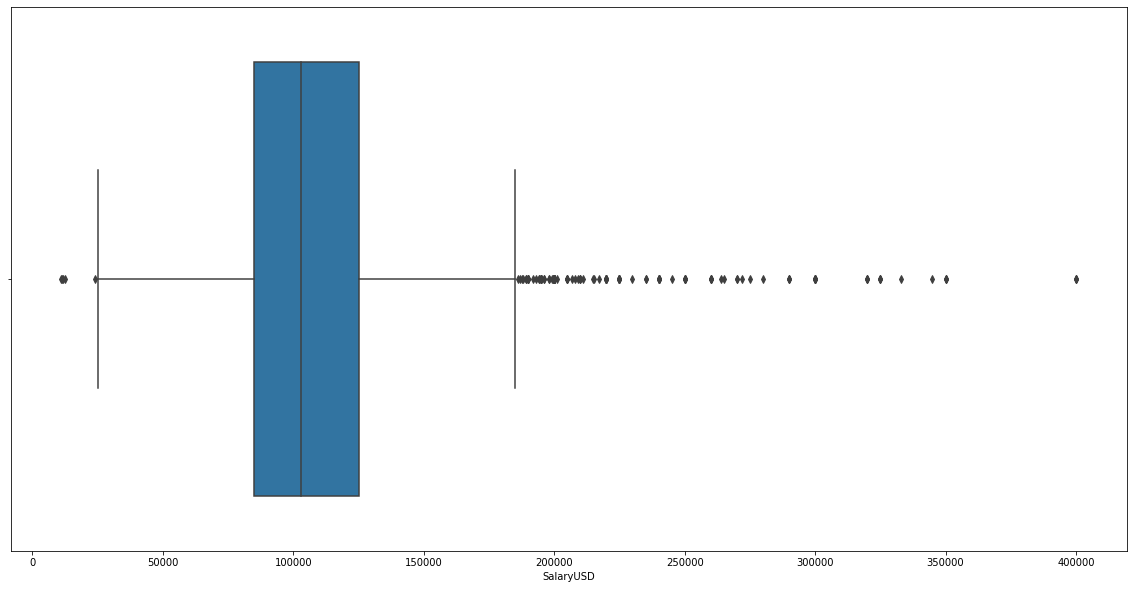

In [381]:
plt.figure(figsize = (20,10))
sns.boxplot(x = df1["SalaryUSD"])

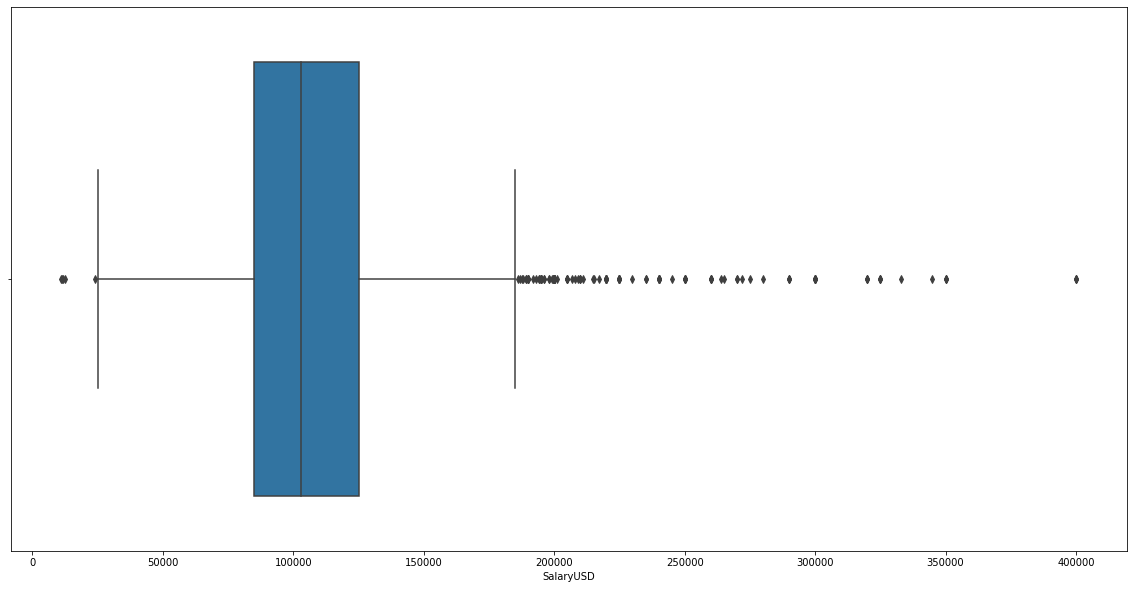

In [383]:
df1 = df1.drop(df1[df1["SalaryUSD"] < 5000].index)
df1 = df1.drop(df1[df1["SalaryUSD"] > 400000].index)
plt.figure(figsize = (20,10))
sns.boxplot(x=df1["SalaryUSD"])

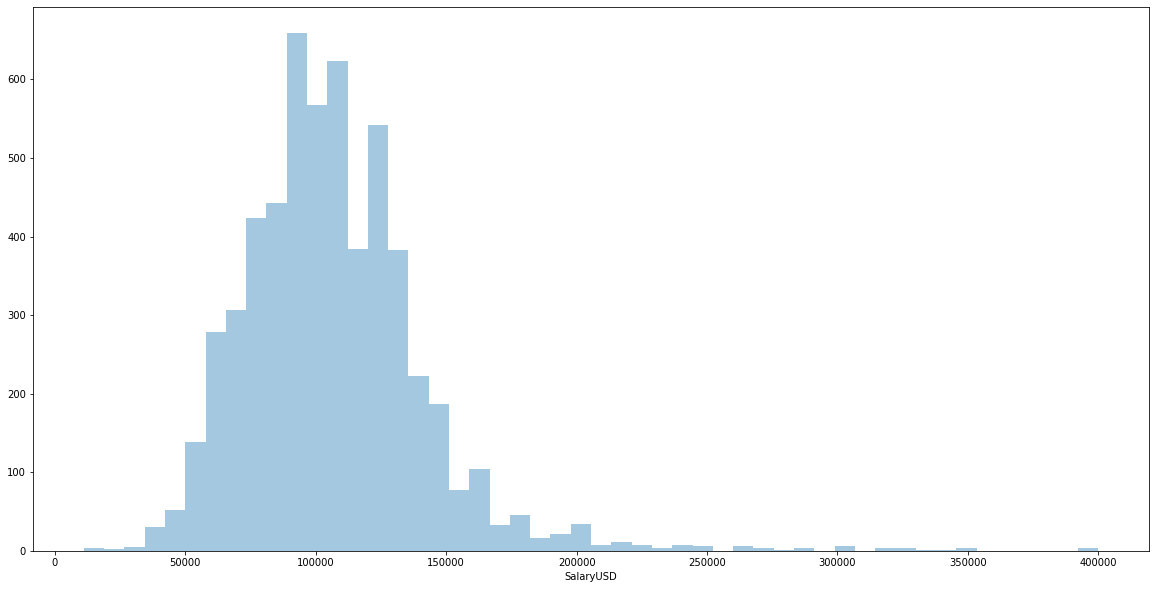

In [385]:
plt.figure(figsize=(20,10))
sns.distplot(df1["SalaryUSD"], kde=False)

### Calcul de la moyenne (salary_mean) et de la mediane (salary_med)

In [387]:
salary_mean = df1["SalaryUSD"].mean()
salary_med = df1["SalaryUSD"].median()

print("Le salaire annuel moyen aux USA est de {}$ et le salaire médian est de {}$".format(round(salary_mean, 2), round(salary_med, 2)))

Le salaire annuel moyen aux USA est de 106466.83$ et le salaire médian est de 103000.0$


### fonctions pour faciliter la manipulation des données

In [389]:

# Return the mean of salary with paremeters 
def get_mean_salary(param, df=df1):
    return round(df.groupby(param)["SalaryUSD"].mean(),2)


# Function for creating barplot
def make_barplot(title, series, size=(10,6)):
    plt.figure(figsize=size)
    plt.title(title)
    return sns.barplot(x=series.index, y=series.values)

# Function for formatting salary on "xK $"
def to_k_usd(x):
    return str(int((x / 1000))) + "K $"

## Salaire moyen en fonction du job title


In [391]:
by_job = get_mean_salary("JobTitle")
by_job.apply(to_k_usd)


JobTitle
Analyst            79K $
Architect         136K $
Data Scientist    122K $
Database Admin    104K $
Developer          99K $
Engineer          110K $
Manager           124K $
Other              98K $
Name: SalaryUSD, dtype: object

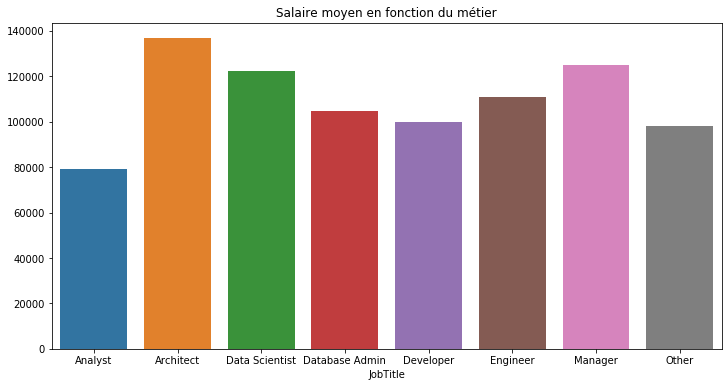

In [393]:
title = "Salaire moyen en fonction du métier"
make_barplot(title, by_job, (12,6))

## Diagramme circulaire de la répartitions de ses jobtitles (base 1)

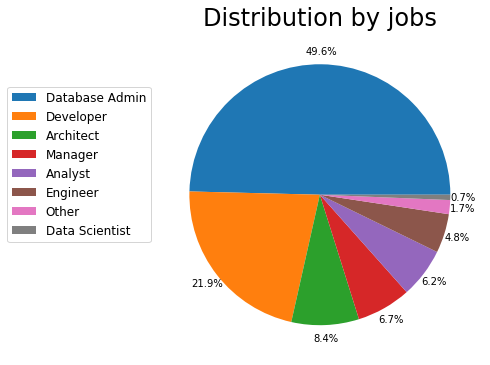

In [395]:
percents = df1["JobTitle"].value_counts().map(lambda f : round(f * 100 / df1["JobTitle"].size,2))
labels = df1["JobTitle"].value_counts().index
values = df1["JobTitle"].value_counts()
fig, ax = plt.subplots()
ax.pie(values, autopct="%1.1f%%", pctdistance=1.1)
plt.title("Distribution by jobs", fontsize=24)
plt.legend(labels, bbox_to_anchor=(0, 0.85),
           fontsize=12)
fig.set_size_inches(6,6)

## Est-il préférable de travailler pour une seule ou plusieurs compagnies?



In [397]:
by_many_cie = get_mean_salary("HowManyCompanies")
by_many_cie.apply(to_k_usd)

HowManyCompanies
1             96K $
2            107K $
3            118K $
4            121K $
5            122K $
6 or more    138K $
Not Asked    105K $
Name: SalaryUSD, dtype: object

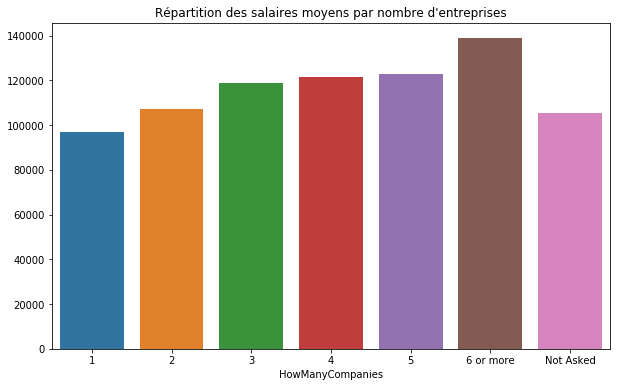

In [399]:
title = "Répartition des salaires moyens par nombre d'entreprises"
make_barplot(title, by_many_cie)

Le graphique montre que les personnes qui ont fait le plus d'entreprises différentes tendent à avoir des salaires plus élevés

## Le nombre de personne dans son équipe a-t-il une influence sur votre salaire?



In [401]:
by_team_size = get_mean_salary("OtherPeopleOnYourTeam")
by_team_size.apply(to_k_usd)

OtherPeopleOnYourTeam
1              104K $
2              102K $
3              106K $
4              103K $
5              105K $
More than 5    108K $
None           108K $
Name: SalaryUSD, dtype: object

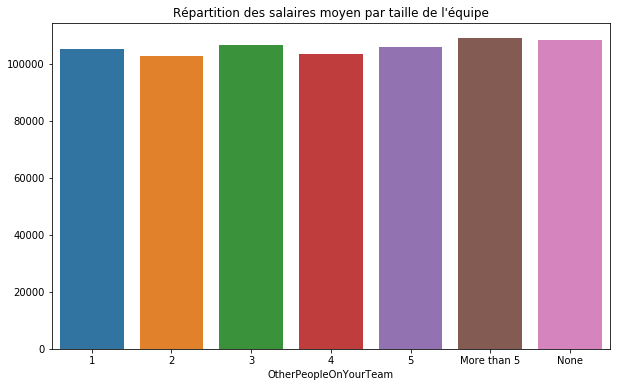

In [403]:
title = "Répartition des salaires moyen par taille de l'équipe"
make_barplot(title, by_team_size)

Le graphique montre que la taille de l'équipe n'a pas d'incidence sur le salaire moyen

## Le nombre d'année d'expérience dans ce type d'emploi a t il une influence sur votre salaire?

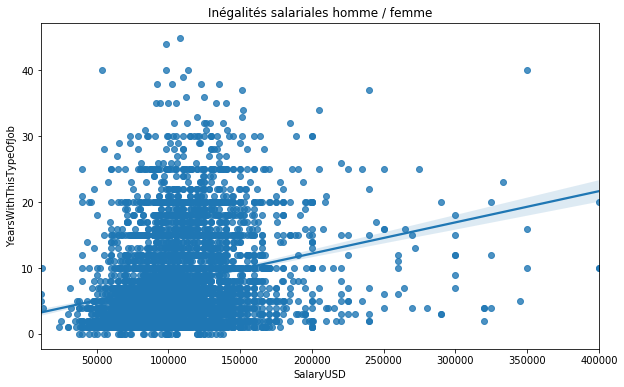

In [405]:
plt.figure(figsize=(10,6))
plt.title(title)
sns.regplot(y=df1.YearsWithThisTypeOfJob, x=df1.SalaryUSD)

## Il y-a-t-il une inégalité salariale entre les hommes et les femmes dans les emplois liées à la data aux Etats Unis?

In [407]:
g_df = df1[["Gender", "SalaryUSD", "JobTitle", "YearsWithThisTypeOfJob"]]
g_df = g_df[g_df.Gender != "Other - NA"]
by_gender = get_mean_salary("Gender", g_df)
by_gender.apply(to_k_usd)

Gender
Female    101K $
Male      107K $
Name: SalaryUSD, dtype: object

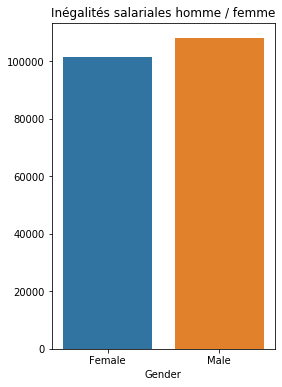

In [408]:
title = "Inégalités salariales homme / femme"
make_barplot(title, by_gender, (4, 6))

## Si cette inégalité salariale existe (suspense), est-elle due au fait que les femmes soient moins bien représentées dans les jobs les mieux payés ou que pour un travail identique elles sont en moyenne moins bien payées?

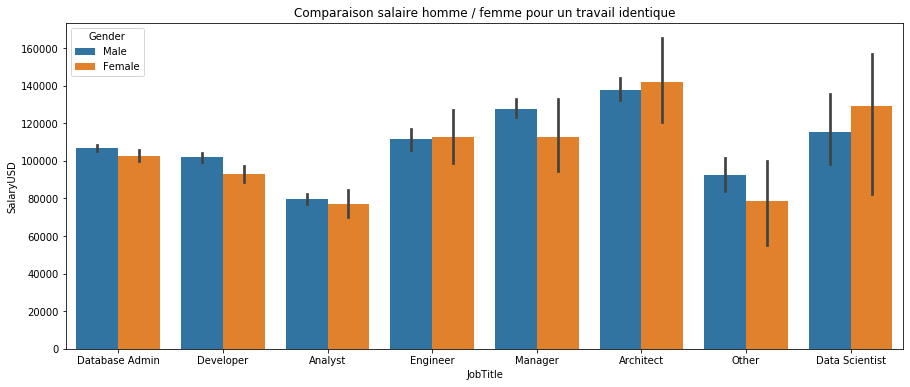

In [409]:
plt.figure(figsize=(15, 6))
plt.title("Comparaison salaire homme / femme pour un travail identique")
sns.barplot(x=g_df.JobTitle, y=g_df.SalaryUSD, hue=g_df.Gender)

## Y a t il une différence entre l'évolution salariale liées à l'expérience dans un même emploi entre les hommes et les femmes?

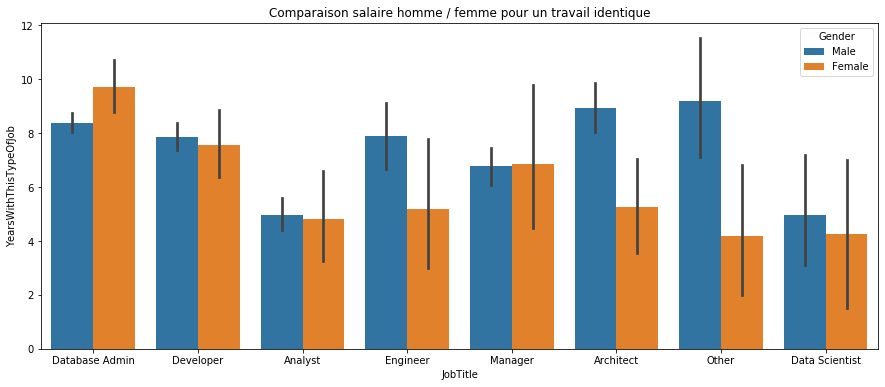

## Résumé en quelques lignes votre plan de carrière pour conquérir le rêve américain.